# Текст

##### ASVspoof - база данных, используемая для конкурса по борьбе с спуфингом и контрмерами (Automatic Speaker Verification Spoofing and Countermeasuers Challenge)
##### Задача ASVspoof направлена на прогресс путем сбора и распространения набора данных с различными атаками, реализованными с помощью множества разнообразных алгоритмов, и проведения серии конкурсных оценок для автоматической верификации говорящего
##### 2013 год - повышение осведомленности о проблеме спуфинга; 2015 год - первая задача по теме, сопровождаемую данными оценки, метриками и протоколами, 2015 - разработке контрмер, способных отличить подлинную речь от поддельной, 2017 год - разработку контрмер, направленных на обнаружение атак с подменой
##### Задача ASVspoof 2019 расширяет предыдущую задачу в нескольких направлениях. Издание 2019 года впервые посвящено мерам противодействия всем трем основным типам атак, а именно атакам на подмену TTS, VC и повторным атакам.
##### База данных ASVspoof 2019 включает в себя два раздела: логического доступа (LA) и физического доступа (PA). Речевые данные получены от 107 дикторов (46 мужчин и 61 женщина). Базы данных LA и PA разделены на три набора данны: обучающий, развивающий и оценочный. Условия записи для всех исходных данных идентичны. Наборы для обучения и разработки содержат спуфинг-атаки, сгенерированные с использованием одних и тех же алгоритмов/условий (обозначаются как известные атаки). Оценочный набор также содержит атаки, сгенерированные с использованием различных алгоритмов/условий (обозначаются как неизвестные атаки).
##### Обучающий набор данных содержит аудиофайлы с известной истиной


#### Извлечь принаки можно с помощью фреймворков Audio-Features Extraction (SPAFE) и pydub
#### Признаки:
* среднее MFCC, IMFCC, BFCC, LFCC, LPC, LPCC,
MSRCC, NGCC, PSRCC, PLP, RPLP, GFCC
* средняя частота
* пик частоты
* стандартное отклонение частоты
* кумулятивная сумма амплитуд
* мода частоты
* медианная частота
* первая квантиль (q25)
* третья квантиль (q75)
* межквантильный интервал (IQR)
* асимметрия
* эксцесс
* спектральные значения: энтропия, плоскостность, центроид, размах, среднее значение, среднеквадратичное отклонение, дисперсия
* спектр магнитуды
* скорость перехода через ноль (средняя)
* минимальная, средняя и максимальная основная и доминирующая частоты, измеренные в акустическом сигнале
* диапазон доминирующих частот, измеренных в акустическом сигнале
* modulation index
* битрейт

#### Метрики: tandem detection cost function (t-DCF), equal error rate (EER)
$tDCF(s) = C_{1}P^{cm}_{miss}(s) + C_{2}P^{cm}_{fa}(s)$
#### где $C_{1}P^{cm}_{miss}$ и $C_{2}P^{cm}_{fa}$ - соответственно частота пропусков и частота ложных срабатываний. Они вычисляются как:
$P^{cm}_{miss} = \frac{TrialsWithSocre <= 5}{Total Trilas}$
$P^{fa}_{miss} = \frac{TrialsWithSocre > 5}{Total Trilas}$
#### Константы $C_{1}$ и $C_{1}$ диктуются затратами на t-DCF, ошибками обнаружения системы.
#### я не собираюсь переписывать ту систему даже не думайте
#### Cшки - затраты системы на неверное опознание цели, ${pi}$ - по порядку в формуле: априорные вероятности целевых, нецелевых и поддельных классов, в сумме дают 1. Pшки - коэффициенты ошибок обнаружения системы
#### Дальше там говорят, что ее сложно инетрпретировать и что для этого введем нормализованную t-DCF, которая будет частным t-DCF и дефолтной t_DCF, которая в свою очередь является минимумом из $C_{1}$ и $C_{2}$. Ну и у них там есть таблица с коэф-ами
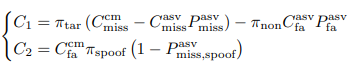
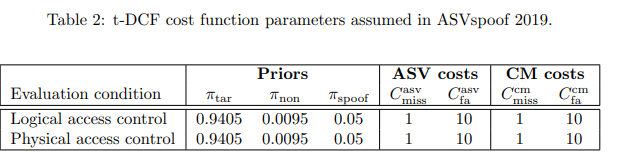


#### Вторая метрика - EER - equal error rate
#### EER соответствует порогу $s_{EER}$, при котором коэффициенты промахов и ложных тревог равны друг другу
#### $EER = P^{cm}_{fa}(s_{EER}) = P^{cm}_{miss}(s_{EER})$

# Извлечение признаков

In [ ]:
!kaggle datasets download -d awsaf49/asvpoof-2019-dataset
!unzip asvpoof-2019-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049006.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049007.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049008.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049009.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049010.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049011.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049012.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049013.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049014.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049015.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049016.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049017.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049018.flac  
  inflating: PA/PA/ASVspoof2019_PA_train/flac/PA_T_0049019.flac  
  inflat

In [ ]:
!pip install pydub spafe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
from pydub import AudioSegment
from spafe.features.mfcc import mfcc
from spafe.features.bfcc import bfcc
from spafe.features.lfcc import lfcc
from spafe.features.lpc import lpc
from spafe.features.msrcc import msrcc
from spafe.features.ngcc import ngcc
from spafe.features.psrcc import psrcc
from spafe.features.rplp import rplp
from spafe.features.gfcc import gfcc
import numpy as np
import librosa
from scipy.stats import skew, kurtosis

In [ ]:
audio_folder = '/content/LA/LA/ASVspoof2019_LA_train/flac'
metadata_file = '/content/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'

#audio_folder = '/content/LA/LA/ASVspoof2019_LA_eval/flac'
#metadata_file = '/content/LA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'

In [ ]:
metadata = pd.read_csv(metadata_file, sep=' ', header=None)
metadata.columns = ['speaker', 'filename', 'sep1', 'sep2', 'label']
metadata = metadata[['filename', 'label']]
metadata.to_csv('/content/metadata.csv', index=False)
metadata

,filename,label
0,LA_T_1138215,bonafide
1,LA_T_1271820,bonafide
2,LA_T_1272637,bonafide
3,LA_T_1276960,bonafide
4,LA_T_1341447,bonafide
...,...,...
25375,LA_T_9717580,spoof
25376,LA_T_9779814,spoof
25377,LA_T_9783312,spoof
25378,LA_T_9839348,spoof


In [ ]:
# Функция для извлечения признаков из аудио файла
def extract_features(audio_path):
    # Загрузка .flac файла с помощью pydub
    audio = AudioSegment.from_file(audio_path, format='flac')
    samples = np.array(audio.get_array_of_samples(), dtype=np.float32)
    samples = samples / (2**15)
    sr = audio.frame_rate

    mfcc_feat = mfcc(samples, sr).mean(axis=0)
    bfcc_feat = bfcc(samples, sr).mean(axis=0)
    lfcc_feat = lfcc(samples, sr).mean(axis=0)
    lpc_feat = lpc(samples, sr)[0].mean(axis=0)
    msrcc_feat = msrcc(samples, sr).mean(axis=0)
    ngcc_feat = ngcc(samples, sr).mean(axis=0)
    psrcc_feat = ngcc(samples, sr).mean(axis=0)
    rplp_feat = rplp(samples, sr).mean(axis=0)
    gfcc_feat = gfcc(samples, sr).mean(axis=0)


    # Спектральные признаки
    spectral_centroid = librosa.feature.spectral_centroid(y=samples, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=samples, sr=sr).mean()
    spectral_contrast = librosa.feature.spectral_contrast(y=samples, sr=sr).mean(axis=1)
    spectral_flatness = librosa.feature.spectral_flatness(y=samples).mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=samples, sr=sr).mean()
    rms = librosa.feature.rms(y=samples).mean()

    # Статистики частоты и амплитуды
    mean_freq = np.mean(samples)
    peak_freq = np.argmax(np.abs(samples))
    std_freq = np.std(samples)
    cum_sum_amplitude = np.cumsum(samples).sum()
    median_freq = np.median(samples)
    q25_freq = np.quantile(samples, 0.25)
    q75_freq = np.quantile(samples, 0.75)
    iqr = q75_freq - q25_freq
    skewness = skew(samples)
    kurt = kurtosis(samples)

    # Добавление признаков в один вектор
    feature_vector = np.hstack((
        mfcc_feat, bfcc_feat, lfcc_feat, lpc_feat,
        msrcc_feat, ngcc_feat, psrcc_feat, rplp_feat, gfcc_feat,
        spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff, rms,
        mean_freq, peak_freq, std_freq, cum_sum_amplitude, median_freq, q25_freq, q75_freq, iqr, skewness, kurt
    ))

    return feature_vector

In [ ]:
features = []
labels = []
k = 0
# Цикл, в котором будет происходить извлечение признаков
for index, row in metadata.iterrows():
    audio_path = audio_folder + '/' + row['filename'] + '.flac'
    label = row['label']

    # Extract features
    features.append(extract_features(audio_path))
    k += 1
    print(k)
    labels.append(label)


features = np.array(features)
labels = np.array(labels)


np.save('features.npy', features)
np.save('labels.npy', labels)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Обучение моделей

In [46]:
data = np.load('features.npy')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [23]:
# Функция для построения ROC-кривой и выведения AUC
def plot_roc_auc(y_train, y_train_predicted, y_test, y_test_predicted, title=None):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)

    plt.figure(figsize=(8, 6.5))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))

    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show();

In [4]:
y_train = np.load('labels.npy')
y_train = y_train[:4000]
y_test = np.load('labels (1).npy')

X_train = np.load('features.npy')
X_test = np.load('features (1).npy')

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
# Обучение XGB
boosting_model = xgboost.XGBClassifier(n_estimators=500)
boosting_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_train_pred = boosting_model.predict_proba(X_train)[:, 1]
y_test_pred = boosting_model.predict_proba(X_test)[:, 1]

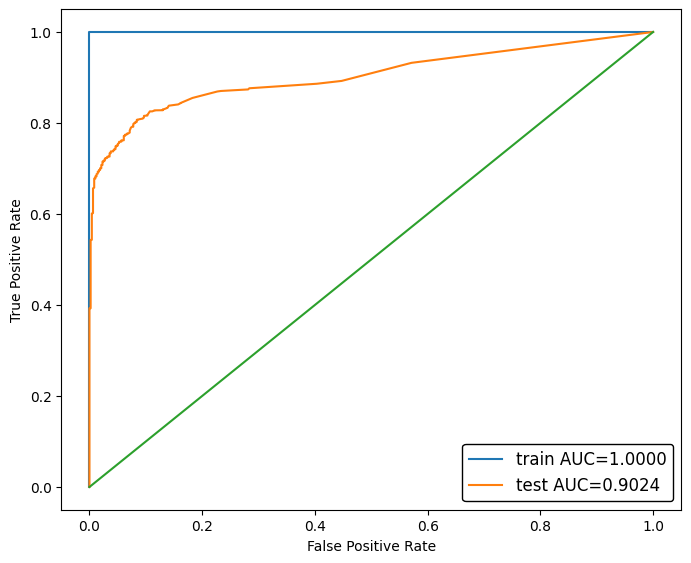

In [18]:
plot_roc_auc(y_train, y_train_pred, y_test, y_test_pred)

In [40]:
# Обучение GBC
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=20)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=20, n_estimators=200)

In [41]:
y_train_pred_gbc = gbc.predict_proba(X_train)[:, 1]
y_test_pred_gbc = gbc.predict_proba(X_test)[:, 1]

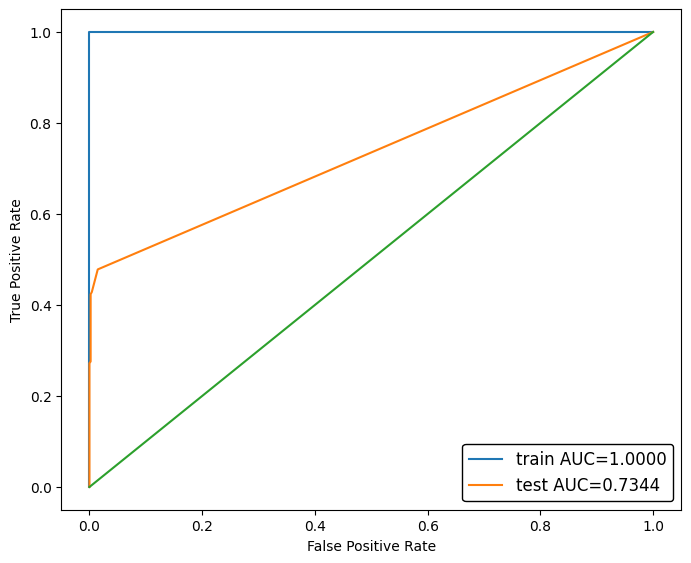

In [42]:
plot_roc_auc(y_train, y_train_pred_gbc, y_test, y_test_pred_gbc)

In [73]:
# Обучение AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=150, learning_rate=0.1)
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [74]:
y_train_pred_abc = abc.predict_proba(X_train)[:, 1]
y_test_pred_abc = abc.predict_proba(X_test)[:, 1]

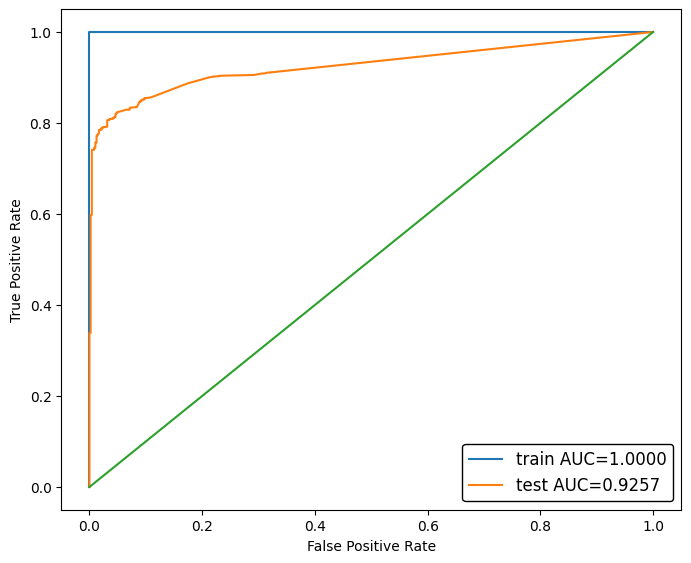

In [75]:
plot_roc_auc(y_train, y_train_pred_abc, y_test, y_test_pred_abc)

In [43]:
# Обучение HistGradientBoostingClassifier
hbc = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=200, max_leaf_nodes=30, max_depth=20)
hbc.fit(X_train, y_train)

HistGradientBoostingClassifier(max_depth=20, max_iter=200, max_leaf_nodes=30)

In [44]:
y_train_pred_hbc = hbc.predict_proba(X_train)[:, 1]
y_test_pred_hbc = hbc.predict_proba(X_test)[:, 1]

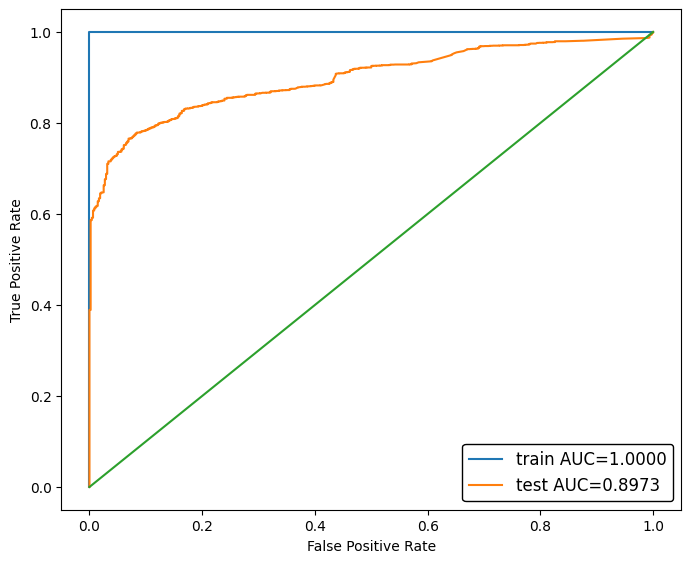

In [45]:
plot_roc_auc(y_train, y_train_pred_hbc, y_test, y_test_pred_hbc)

In [25]:
# Функция для EER метрики
def EER(labels, outputs):
    fpr, tpr, threshold = roc_curve(labels, outputs, pos_label=1)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_threshold
    eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    return eer

In [78]:
# EER для XGB
EER(y_test, y_test_pred)

0.15756302521008403

In [77]:
# EER для AdaBoostClassifier
EER(y_test, y_test_pred_abc)

0.11134453781512606

In [115]:
# EER для GBC
EER(y_test, y_test_pred_gbc)

0.004201680672268907

In [32]:
# EER для HBC
EER(y_test, y_test_pred_hbc)

0.17016806722689076